# Multiclass Classifiers
In this assignment you will load a dataset and train two models to perform multiclass classification and compare the results of the models. The dataset is the **digits** dataset available from the sklearn's *datasets* library. This dataset contain 1797 samples of written digits. The goal is to correctly identify digits from 0 to 9.

## Load the data

1. import the *load_digits* function from the *sklearn.datasets* library
2. invoke *load_digits* with the *return_X_y* parameter set to true and store the returned dataset in variable **X** and **y**.

In [1]:
from dask.distributed import Client, progress

client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
client

Client Scheduler: tcp://127.0.0.1:60424 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 8.00 GB


In [3]:
import numpy as np
import dask.array as da
from dask import delayed
from sklearn.datasets import load_digits

@delayed
def get_data():
    X, y = load_digits(return_X_y=True)
    return X, y

## Exploratory Data Analysis
Perform a few exploratory  steps including:

1. Display the number of rows of data returned
2. Display the number of features in the dataset
3. Use Numpy's **bincount** to display how many samples belong to each class. Is this a balanced dataset?

In [5]:

dataset = get_data()

X = dataset[0]
y = dataset[1]

print('The number of rows in the dataset is {:d}'.format(X.data.compute().shape[0]))
print('The number of features in the dataset is {:d}'.format(X.data.shape[1].compute()))

#da.bincount(y.compute())
np.bincount(y.compute())

The number of rows in the dataset is 1797
The number of features in the dataset is 64


array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

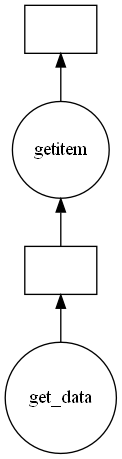

In [6]:
X.visualize()

Yes. This is a fairly well balanced dataset.


## Prepare training and testing data
1. Use *train_test_split* to split the dataset into a training set and a test set. Set the proportion of test data to 20%. Set a random state value so that the results will be repeatable.

In [7]:
from dask_ml.model_selection import train_test_split

In [9]:
#Size of the test set.
SIZE = 0.2

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SIZE)
X_train, X_test, y_train, y_test = train_test_split(X.compute(), y.compute(), test_size=SIZE)

## Cross validation with Logistic Regression
In this step you will create a LogisticRegression classifier and use 5-fold cross validation to train the model.

1. import *LogisticRegression* classifier from sklearn
2. instantiate a LogisticRegression classifier with the 'lbfgs' solver and 'ovr' multiclass strategy. You may have to set the maximum number of iterations to 1000.
3. perform cross validation on the model
4. print the cross validation scores and the mean of the cross validation scores.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score 
import joblib

In [12]:
lr_clf = LogisticRegression(solver='lbfgs', multi_class='ovr', penalty='none', max_iter=10000)
with joblib.parallel_backend('dask'):
    lr_cv_scores = cross_val_score(lr_clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', lr_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(lr_cv_scores)))

Accuracy scores for the 5 folds:  [0.89236111 0.88541667 0.94425087 0.94425087 0.88501742]
Mean cross validation score: 0.910


## Cross validation with RandomForest
Perform the same steps as above but this time with a RandomForestClassifier.

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=24)
with joblib.parallel_backend('dask'):
    rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', rf_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(rf_cv_scores)))

Accuracy scores for the 5 folds:  [0.93402778 0.96180556 0.96515679 0.96515679 0.96167247]
Mean cross validation score: 0.958
